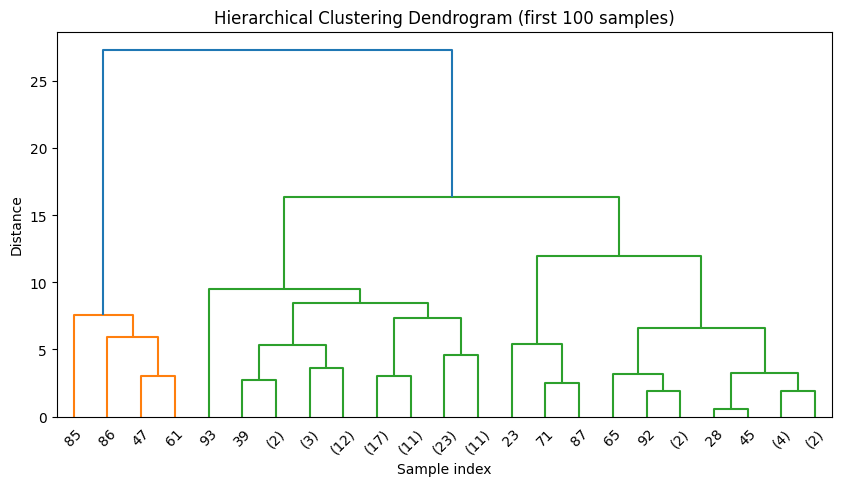

Cluster counts (Agglomerative):
Cluster_Agg
1    281
2    153
0      6
Name: count, dtype: int64

Cluster-wise mean spending (Agglomerative profile):
                    Fresh          Milk       Grocery       Frozen  \
Cluster_Agg                                                          
0            27477.000000  43542.166667  54588.500000  8285.666667   
1            15048.932384   3017.298932   3791.761566  3837.316726   
2             5794.241830   9419.888889  13761.738562  1461.764706   

             Detergents_Paper    Delicassen  
Cluster_Agg                                  
0                25018.333333  10247.833333  
1                  758.007117   1309.900356  
2                 5913.379085   1577.607843  

Silhouette score (Agglomerative, k=3): 0.265


In [ ]:
# ===========================================
# HIERARCHICAL & AGGLOMERATIVE CLUSTERING
# Wholesale customers dataset
# ===========================================

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

# 1) Load dataset
url = "https://raw.githubusercontent.com/akay6483/mmml-ecommerce/main/dataset/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

# Drop extra index column if present
if 'index' in df.columns:
    df = df.drop(columns=['index'])

# 2) Select features (same as K-Means)
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[features]

# 3) Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===========================================
# A) HIERARCHICAL CLUSTERING - DENDROGRAM
#    (bottom-up merging of closest clusters)
# ===========================================

# Use a subset (e.g., first 100 points) for clearer dendrogram
X_sub = X_scaled[:100]

# 'ward' linkage merges clusters that cause the minimum increase in total within-cluster variance
linked = linkage(X_sub, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (first 100 samples)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# ===========================================
# B) AGGLOMERATIVE CLUSTERING (SCIKIT-LEARN)
#    Cut the hierarchy into k clusters
# ===========================================

k = 3   # choose number of clusters (e.g., from dendrogram or silhouette)
agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels_agg = agg.fit_predict(X_scaled)

# Attach labels to dataframe
df['Cluster_Agg'] = labels_agg

print("Cluster counts (Agglomerative):")
print(df['Cluster_Agg'].value_counts())

print("\nCluster-wise mean spending (Agglomerative profile):")
cluster_profile_agg = df.groupby('Cluster_Agg')[features].mean()
print(cluster_profile_agg)

# Optional: silhouette score to measure how good the clustering is
sil_agg = silhouette_score(X_scaled, labels_agg)
print(f"\nSilhouette score (Agglomerative, k={k}): {sil_agg:.3f}")
